In [1]:
from keras.layers import Input,Dense
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import keras

Using TensorFlow backend.


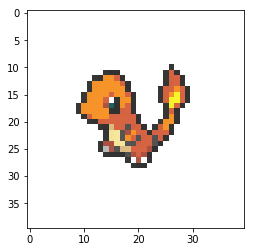

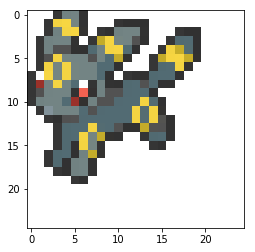

In [3]:

img=mpimg.imread('figure/004MS.png')
imgplot = plt.imshow(img[:,:,0:3])
plt.show()

img=mpimg.imread('figure/002MS.png')
imgplot = plt.imshow(x_test[6][5:35,5:35,0:3])
plt.show()

In [2]:
%%time
import os
for dirPath, dirNames, fileNames in os.walk("figure"):
    pass
data=[]
for name in fileNames:
    path='figure/'+name
    img=mpimg.imread(path)
    data.append(img[5:35,5:35,0:4])
data=np.array(data)

x_train=data[:640]
x_test=data[640:]

x_train=x_train.reshape(len(x_train),30,30,4)
x_test=x_test.reshape(len(x_test),30,30,4)

print('x_train shape=',x_train.shape)
print('x_test shape=',x_test.shape)

x_train shape= (640, 30, 30, 4)
x_test shape= (152, 30, 30, 4)
CPU times: user 164 ms, sys: 60 ms, total: 224 ms
Wall time: 807 ms


In [48]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img=Input(shape=(32,32,4))

x=Conv2D(32,(3,3),activation='relu',padding='same')(input_img)
print(x.shape)
x=MaxPooling2D((2,2),padding='same')(x)
print(x.shape)
x=Conv2D(16,(3,3),activation='relu',padding='same')(x)
print(x.shape)
x=MaxPooling2D((2,2),padding='same')(x)
print(x.shape)
x=Conv2D(8,(3,3),activation='relu',padding='same')(x)
print(x.shape)
encoded=MaxPooling2D((2,2),padding='same')(x)
print(encoded.shape)

x=Conv2D(8,(3,3),activation='relu',padding='same')(encoded)
print(x.shape)
x=UpSampling2D((2,2))(x)
print(x.shape)
x=Conv2D(16,(3,3),activation='relu',padding='same')(x)
print(x.shape)
x=UpSampling2D((2,2))(x)
print(x.shape)
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
print(x.shape)
x=UpSampling2D((2,2))(x)
print(x.shape)
decoded=Conv2D(4,(3,3),activation='sigmoid',padding='same')(x)
print(decoded.shape)



(?, 32, 32, 32)
(?, 16, 16, 32)
(?, 16, 16, 16)
(?, 8, 8, 16)
(?, 8, 8, 8)
(?, 4, 4, 8)
(?, 4, 4, 8)
(?, 8, 8, 8)
(?, 8, 8, 16)
(?, 16, 16, 16)
(?, 16, 16, 32)
(?, 32, 32, 32)
(?, 32, 32, 4)


In [22]:
input_img=Input(shape=(30,30,4))
#autoencoder=Model(input_img,decoded)
#keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
autoencoder.compile(optimizer='Adamax',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=100,batch_size=64,shuffle=True,validation_data=(x_test,x_test))

Train on 640 samples, validate on 152 samples
Epoch 1/100
640/640 [==============================] - 1s 1ms/step - loss: 0.2394 - val_loss: 0.2481
Epoch 2/100
640/640 [==============================] - 1s 1ms/step - loss: 0.2095 - val_loss: 0.2405
Epoch 3/100
640/640 [==============================] - 1s 968us/step - loss: 0.2038 - val_loss: 0.2398
Epoch 4/100
640/640 [==============================] - 1s 1ms/step - loss: 0.2002 - val_loss: 0.2405
Epoch 5/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1994 - val_loss: 0.2415
Epoch 6/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1987 - val_loss: 0.2413
Epoch 7/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1984 - val_loss: 0.2411
Epoch 8/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1983 - val_loss: 0.2409
Epoch 9/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1983 - val_loss: 0.2407
Epoch 10/100
640/640 [=====================

Epoch 81/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1981 - val_loss: 0.2409
Epoch 82/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1981 - val_loss: 0.2410
Epoch 83/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1981 - val_loss: 0.2410
Epoch 84/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1981 - val_loss: 0.2409
Epoch 85/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1981 - val_loss: 0.2412
Epoch 86/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1981 - val_loss: 0.2415
Epoch 87/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1981 - val_loss: 0.2410
Epoch 88/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1981 - val_loss: 0.2413
Epoch 89/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1981 - val_loss: 0.2412
Epoch 90/100
640/640 [==============================] - 1s 1ms/step - loss: 0.1981

In [23]:
input_img=Input(shape=(30,30,4))

encoder_layer1=autoencoder.layers[0](input_img)
encoder_layer2=autoencoder.layers[1](encoder_layer1)
encoder_layer3=autoencoder.layers[2](encoder_layer2)
encoder_layer4=autoencoder.layers[3](encoder_layer3)
encoder_layer5=autoencoder.layers[4](encoder_layer4)
encoder=Model(input_img,encoder_layer5)


encoded_input=Input(shape=(5, 5, 8))
decoder_layer=encoded_input
for i in range(5):
    temp=autoencoder.layers[i-5]
    decoder_layer=temp(decoder_layer)

decoder=Model(encoded_input,decoder_layer)

In [206]:
import json
from keras.applications import imagenet_utils
with open('./pokemon_30.json', 'w') as jsOut:
    json.dump(autoencoder.to_json(), jsOut)
autoencoder.save_weights('./pokemon_30_weight.h5')

In [4]:
from keras.models import model_from_json
import json
with open('./pokemon_30.json', 'r') as jsIn:
    modelJson=json.load(jsIn)

autoencoder=model_from_json(modelJson)
autoencoder.load_weights('./pokemon_30_weight.h5')
#autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
#autoencoder.fit(x_train,x_train,epochs=10,batch_size=64,shuffle=True,validation_data=(x_test,x_test))
input_img=Input(shape=(30,30,4))

encoder_layer1=autoencoder.layers[0](input_img)
encoder_layer2=autoencoder.layers[1](encoder_layer1)
encoder_layer3=autoencoder.layers[2](encoder_layer2)
encoder_layer4=autoencoder.layers[3](encoder_layer3)
encoder_layer5=autoencoder.layers[4](encoder_layer4)
encoder=Model(input_img,encoder_layer5)


encoded_input=Input(shape=(5, 5, 8))
decoder_layer=encoded_input
for i in range(5):
    temp=autoencoder.layers[i-5]
    decoder_layer=temp(decoder_layer)

decoder=Model(encoded_input,decoder_layer)

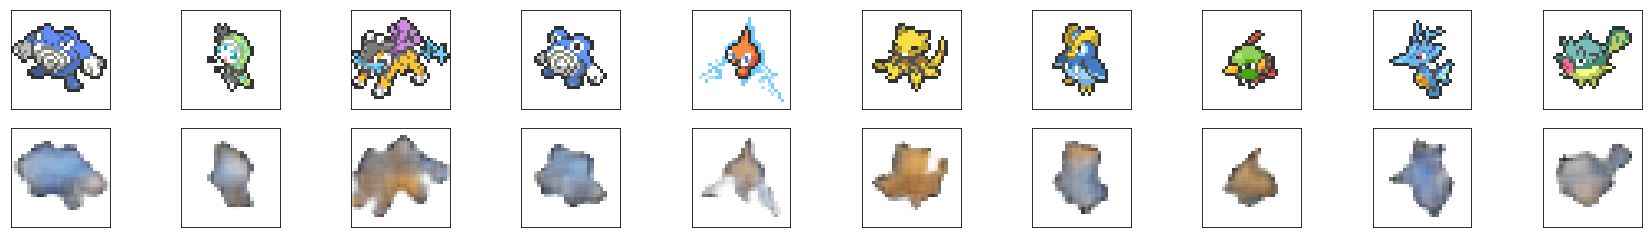

In [24]:
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)
n = 10  # how many digits we will display
plt.figure(figsize=(30, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    imgplot = plt.imshow(x_train[i])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    imgplot = plt.imshow(decoded_imgs[i])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

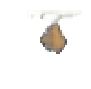

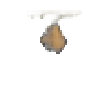

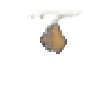

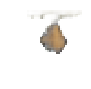

In [10]:

for i in range(4):
    test=encoded_imgs[0]
    test=test.reshape((1,5,5,8))
    test[0,0,:,:]*=0.3
    test_imgs = decoder.predict(test)
    plt.figure(figsize=(1, 1))
    plt.axis('off')

    
    imgplot = plt.imshow(test_imgs[0])


    plt.show()

(640, 30, 30, 4)


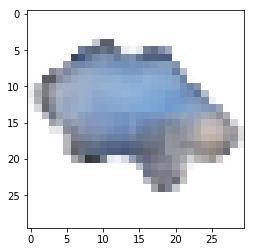

(152, 30, 30, 4)


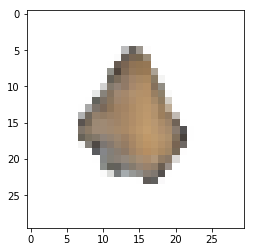

In [25]:
encoded_imgs = encoder.predict(x_train)
decoded_imgs = decoder.predict(encoded_imgs)

print(decoded_imgs.shape)
imgplot = plt.imshow(decoded_imgs[0])
plt.show()

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

print(decoded_imgs.shape)
imgplot = plt.imshow(decoded_imgs[0])
plt.show()